In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize']=(20,5)
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import pyarrow.parquet as pq

In [40]:
def sliderPlot(df1,i):
    fig = px.line(df1, y=df1[i] )
    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=2, label="2y", step="year", stepmode="backward"),
                dict(count=3, label="3y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ))
    fig.show()

In [2]:
# df=pd.read_csv(r'C:/Users/Harsh/Downloads/DLMS Data/data.parquet')

In [3]:
table = pq.read_table(r'C:/Users/Harsh/Downloads/DLMS Data/data.parquet')

# Convert it to a Pandas DataFrame (optional)
dframe = table.to_pandas()

In [4]:
dframe

,sensor,Clock,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,Kwh
0,5f718c439c7a78.65267835,2022-11-18 00:30:00,6499.0,6514.0,6473.0,27.74,27.42,25.57,261300.0
1,5f718c439c7a78.65267835,2022-11-18 01:00:00,6520.0,6535.0,6494.0,27.29,26.84,24.40,254300.0
2,5f718c439c7a78.65267835,2022-11-18 01:30:00,6536.0,6551.0,6511.0,27.06,27.00,24.37,254800.0
3,5f718c439c7a78.65267835,2022-11-18 02:00:00,6576.0,6591.0,6550.0,25.49,25.53,23.30,242600.0
4,5f718c439c7a78.65267835,2022-11-18 02:30:00,6590.0,6605.0,6564.0,25.21,24.74,23.09,238900.0
...,...,...,...,...,...,...,...,...,...
38361,62a9920f75c931.62399458,2023-11-01 10:00:00,6021.0,6006.0,5968.0,18.01,14.66,18.98,153800.0
38362,62a9920f75c931.62399458,2023-11-01 10:30:00,6009.0,5995.0,5960.0,17.24,15.09,17.22,147700.0
38363,62a9920f75c931.62399458,2023-11-01 11:00:00,6024.0,6012.0,5976.0,17.84,14.13,17.95,149000.0
38364,62a9920f75c931.62399458,2023-11-01 11:30:00,6029.0,6016.0,5978.0,15.22,12.04,15.57,127700.0


In [5]:
id=dframe['sensor'].unique()
id

array(['5f718c439c7a78.65267835', '62a9920f75c931.62399458'], dtype=object)

In [6]:
for location in id:
    df=dframe[dframe['sensor'] == location ]
    print(location)

5f718c439c7a78.65267835
62a9920f75c931.62399458


In [7]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38366 entries, 0 to 38365
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   sensor     38366 non-null  object        
 1   Clock      38366 non-null  datetime64[ns]
 2   R_Voltage  38366 non-null  float64       
 3   Y_Voltage  38366 non-null  float64       
 4   B_Voltage  38366 non-null  float64       
 5   R_Current  38366 non-null  float64       
 6   Y_Current  38366 non-null  float64       
 7   B_Current  38366 non-null  float64       
 8   Kwh        38366 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.6+ MB


In [28]:
lst=[]
for location in id:
    df=dframe[dframe['sensor'] == location ]
    # df['Clock']=pd.to_datetime(df['Clock'])
    df.set_index(['Clock'],inplace=True,drop= True)
    df['2022-12-05 00:00:00':]
    filtered_df = df[((df['R_Voltage'] == 0) | (df['Y_Voltage'] == 0) | (df['B_Voltage'] == 0)) & 
                     ((df['R_Current'] == 0) | (df['Y_Current'] == 0) | (df['B_Current'] == 0))]
    filtered_df['Kwh'] = 0
    df.loc[filtered_df.index, :] = filtered_df
    # df=df[['Kwh']].resample(rule='1H').sum()

    lst.append(df)

In [29]:
df1=lst[0]
df1

,sensor,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,Kwh
Clock,,,,,,,,
2022-11-18 00:30:00,5f718c439c7a78.65267835,6499.0,6514.0,6473.0,27.74,27.42,25.57,261300.0
2022-11-18 01:00:00,5f718c439c7a78.65267835,6520.0,6535.0,6494.0,27.29,26.84,24.40,254300.0
2022-11-18 01:30:00,5f718c439c7a78.65267835,6536.0,6551.0,6511.0,27.06,27.00,24.37,254800.0
2022-11-18 02:00:00,5f718c439c7a78.65267835,6576.0,6591.0,6550.0,25.49,25.53,23.30,242600.0
2022-11-18 02:30:00,5f718c439c7a78.65267835,6590.0,6605.0,6564.0,25.21,24.74,23.09,238900.0
...,...,...,...,...,...,...,...,...
2023-11-01 00:30:00,5f718c439c7a78.65267835,6426.0,6451.0,6390.0,47.78,44.16,43.67,431900.0
2023-11-01 01:00:00,5f718c439c7a78.65267835,6447.0,6473.0,6414.0,46.20,42.72,42.53,420300.0
2023-11-01 01:30:00,5f718c439c7a78.65267835,6473.0,6497.0,6437.0,43.15,39.89,40.01,394800.0


In [30]:
df1=df1[['Kwh']].resample(rule='30Min').sum()
df1

,Kwh
Clock,
2022-11-18 00:30:00,261300.0
2022-11-18 01:00:00,254300.0
2022-11-18 01:30:00,254800.0
2022-11-18 02:00:00,242600.0
2022-11-18 02:30:00,238900.0
...,...
2023-11-01 00:00:00,455100.0
2023-11-01 00:30:00,431900.0
2023-11-01 01:00:00,420300.0


In [31]:
df1.isna().sum()

Kwh    0
dtype: int64

In [32]:
df2=lst[1]
df2

,sensor,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,Kwh
Clock,,,,,,,,
2022-05-13 00:30:00,62a9920f75c931.62399458,6094.0,6090.0,6056.0,59.13,57.67,48.40,496900.0
2022-05-13 01:00:00,62a9920f75c931.62399458,6154.0,6144.0,6113.0,55.42,54.02,45.46,469700.0
2022-05-13 01:30:00,62a9920f75c931.62399458,6189.0,6186.0,6151.0,53.86,52.04,44.72,459100.0
2022-05-13 02:00:00,62a9920f75c931.62399458,6219.0,6211.0,6176.0,52.02,50.49,43.43,446100.0
2022-05-13 02:30:00,62a9920f75c931.62399458,6249.0,6241.0,6205.0,50.18,50.31,41.89,437300.0
...,...,...,...,...,...,...,...,...
2023-11-01 10:00:00,62a9920f75c931.62399458,6021.0,6006.0,5968.0,18.01,14.66,18.98,153800.0
2023-11-01 10:30:00,62a9920f75c931.62399458,6009.0,5995.0,5960.0,17.24,15.09,17.22,147700.0
2023-11-01 11:00:00,62a9920f75c931.62399458,6024.0,6012.0,5976.0,17.84,14.13,17.95,149000.0


In [45]:
df2['2022-09-07 15:30:00':'2022-12-04 00:00:00']

,sensor,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,Kwh
Clock,,,,,,,,
2022-09-07 15:30:00,62a9920f75c931.62399458,5921.0,5918.0,5886.0,32.02,35.57,35.45,303400.0
2022-09-07 16:00:00,62a9920f75c931.62399458,5986.0,5984.0,5950.0,33.80,34.87,35.47,309900.0
2022-09-07 16:30:00,62a9920f75c931.62399458,6073.0,6070.0,6036.0,30.74,31.54,31.44,282700.0
2022-09-07 17:00:00,62a9920f75c931.62399458,6125.0,6115.0,6089.0,29.24,31.39,31.61,278800.0
2022-12-03 00:30:00,62a9920f75c931.62399458,6317.0,6296.0,6255.0,9.02,8.56,9.84,86100.0
2022-12-03 01:00:00,62a9920f75c931.62399458,6331.0,6309.0,6270.0,8.00,7.98,9.33,79500.0
2022-12-03 01:30:00,62a9920f75c931.62399458,6359.0,6337.0,6296.0,7.00,7.18,8.54,71700.0
2022-12-03 02:00:00,62a9920f75c931.62399458,6368.0,6347.0,6305.0,7.05,6.33,7.77,66700.0
2022-12-03 02:30:00,62a9920f75c931.62399458,6390.0,6368.0,6326.0,7.17,6.35,7.71,67300.0


In [33]:
df2_s=df2[['Kwh']].resample(rule='30Min').max()
df2_s

,Kwh
Clock,
2022-05-13 00:30:00,496900.0
2022-05-13 01:00:00,469700.0
2022-05-13 01:30:00,459100.0
2022-05-13 02:00:00,446100.0
2022-05-13 02:30:00,437300.0
...,...
2023-11-01 10:00:00,153800.0
2023-11-01 10:30:00,147700.0
2023-11-01 11:00:00,149000.0


In [35]:
df2_s.isna().sum()

Kwh    4142
dtype: int64

In [24]:
result = df2 - df2_s 

In [27]:
result['Kwh'].unique()

array([0.])

In [42]:
sliderPlot(df2_s,'Kwh')

<Axes: xlabel='Clock'>

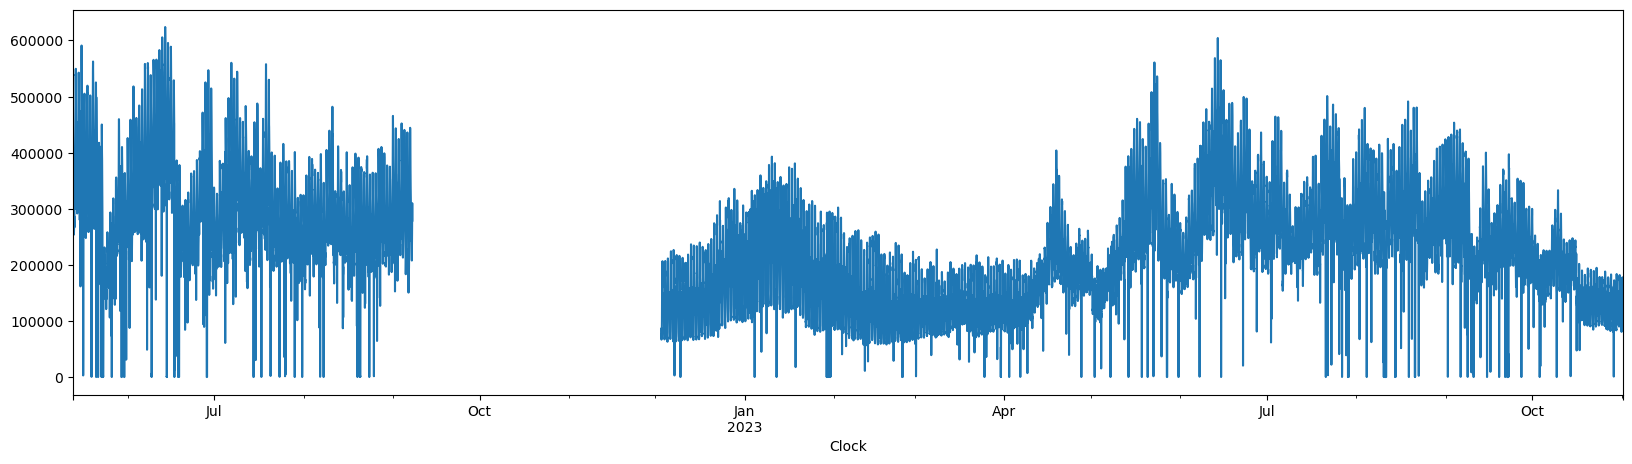

In [37]:
df2_s['Kwh'].plot()

In [36]:
indices_with_missing_values = df2_s[df2_s.isnull().any(axis=1)].index

# Display the indices
print(indices_with_missing_values)

DatetimeIndex(['2022-09-07 17:30:00', '2022-09-07 18:00:00',
               '2022-09-07 18:30:00', '2022-09-07 19:00:00',
               '2022-09-07 19:30:00', '2022-09-07 20:00:00',
               '2022-09-07 20:30:00', '2022-09-07 21:00:00',
               '2022-09-07 21:30:00', '2022-09-07 22:00:00',
               ...
               '2022-12-02 19:30:00', '2022-12-02 20:00:00',
               '2022-12-02 20:30:00', '2022-12-02 21:00:00',
               '2022-12-02 21:30:00', '2022-12-02 22:00:00',
               '2022-12-02 22:30:00', '2022-12-02 23:00:00',
               '2022-12-02 23:30:00', '2022-12-03 00:00:00'],
              dtype='datetime64[ns]', name='Clock', length=4142, freq='30T')


In [19]:
df2=df2[['Kwh']].resample(rule='30Min').mean()
df2

,Kwh
Clock,
2022-05-13 00:30:00,496900.0
2022-05-13 01:00:00,469700.0
2022-05-13 01:30:00,459100.0
2022-05-13 02:00:00,446100.0
2022-05-13 02:30:00,437300.0
...,...
2023-11-01 10:00:00,153800.0
2023-11-01 10:30:00,147700.0
2023-11-01 11:00:00,149000.0


In [20]:
df2.isna().sum()

Kwh    0
dtype: int64